In [1]:
import pandas as pd

# Load the dataset
insurance_df = pd.read_csv('insurance/insurance.csv')

# Display the first few rows of the dataset
insurance_df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
# Get basic statistics for the dataset
insurance_df.describe(include='all')


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [3]:
from scipy.stats import ttest_ind

# Separate the charges for smokers and non-smokers
smokers_charges = insurance_df[insurance_df['smoker'] == 'yes']['charges']
non_smokers_charges = insurance_df[insurance_df['smoker'] == 'no']['charges']

# Conduct a t-test
t_stat, p_value = ttest_ind(smokers_charges, non_smokers_charges)

t_stat, p_value

(46.66492117272371, 8.271435842179102e-283)

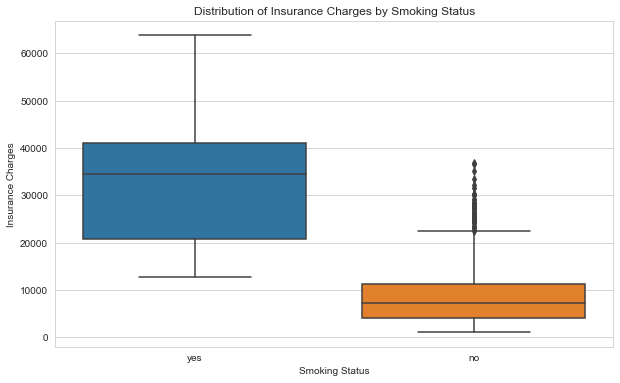

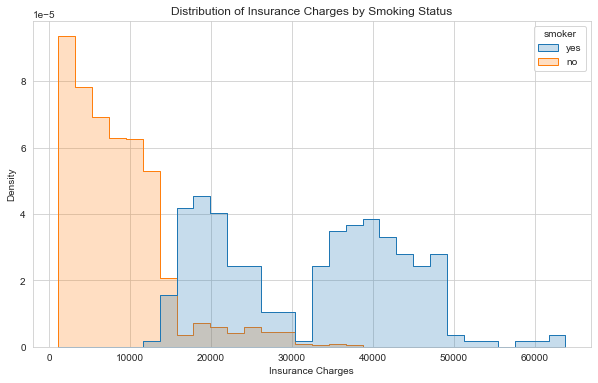

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create a boxplot for charges based on smoking status
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=insurance_df)
plt.title('Distribution of Insurance Charges by Smoking Status')
plt.ylabel('Insurance Charges')
plt.xlabel('Smoking Status')
plt.show()

# Create a histogram for charges based on smoking status
plt.figure(figsize=(10, 6))
sns.histplot(insurance_df, x='charges', hue='smoker', element='step', stat='density', common_norm=False)
plt.title('Distribution of Insurance Charges by Smoking Status')
plt.xlabel('Insurance Charges')
plt.ylabel('Density')
plt.show()

In [5]:
# Summary statistics for charges based on smoking status
summary_stats_smokers = smokers_charges.describe()
summary_stats_non_smokers = non_smokers_charges.describe()

summary_stats = pd.DataFrame({
    'Smokers': summary_stats_smokers,
    'Non-Smokers': summary_stats_non_smokers
})

summary_stats


,Smokers,Non-Smokers
count,274.000000,1064.000000
mean,32050.231832,8434.268298
std,11541.547176,5993.781819
min,12829.455100,1121.873900
25%,20826.244213,3986.438700
50%,34456.348450,7345.405300
75%,41019.207275,11362.887050
max,63770.428010,36910.608030


In [7]:
# Separate the charges for males and females
males_charges = insurance_df[insurance_df['sex'] == 'male']['charges']
females_charges = insurance_df[insurance_df['sex'] == 'female']['charges']

# Conduct a t-test
t_stat_gender, p_value_gender = ttest_ind(males_charges, females_charges)

t_stat_gender, p_value_gender


(2.097546590051688, 0.03613272100592976)

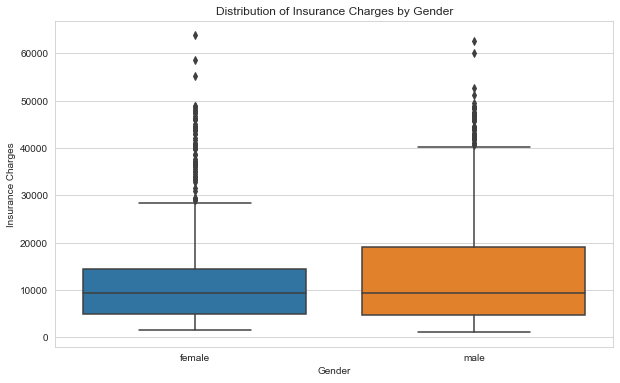

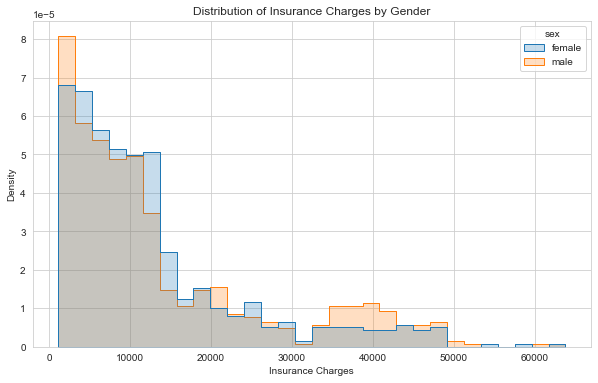

,Males,Females
count,676.000000,662.000000
mean,13956.751178,12569.578844
std,12971.025915,11128.703801
min,1121.873900,1607.510100
25%,4619.134000,4885.158700
50%,9369.615750,9412.962500
75%,18989.590250,14454.691825
max,62592.873090,63770.428010


In [8]:
# Create a boxplot for charges based on gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=insurance_df)
plt.title('Distribution of Insurance Charges by Gender')
plt.ylabel('Insurance Charges')
plt.xlabel('Gender')
plt.show()

# Create a histogram for charges based on gender
plt.figure(figsize=(10, 6))
sns.histplot(insurance_df, x='charges', hue='sex', element='step', stat='density', common_norm=False)
plt.title('Distribution of Insurance Charges by Gender')
plt.xlabel('Insurance Charges')
plt.ylabel('Density')
plt.show()

# Summary statistics for charges based on gender
summary_stats_males = males_charges.describe()
summary_stats_females = females_charges.describe()

summary_stats_gender = pd.DataFrame({
    'Males': summary_stats_males,
    'Females': summary_stats_females
})

summary_stats_gender

In [9]:
from scipy.stats import f_oneway

# Separate charges based on regions
northeast_charges = insurance_df[insurance_df['region'] == 'northeast']['charges']
northwest_charges = insurance_df[insurance_df['region'] == 'northwest']['charges']
southeast_charges = insurance_df[insurance_df['region'] == 'southeast']['charges']
southwest_charges = insurance_df[insurance_df['region'] == 'southwest']['charges']

# Conduct one-way ANOVA
f_stat, p_value_anova = f_oneway(northeast_charges, northwest_charges, southeast_charges, southwest_charges)

f_stat, p_value_anova

(2.96962669358912, 0.0308933560705201)

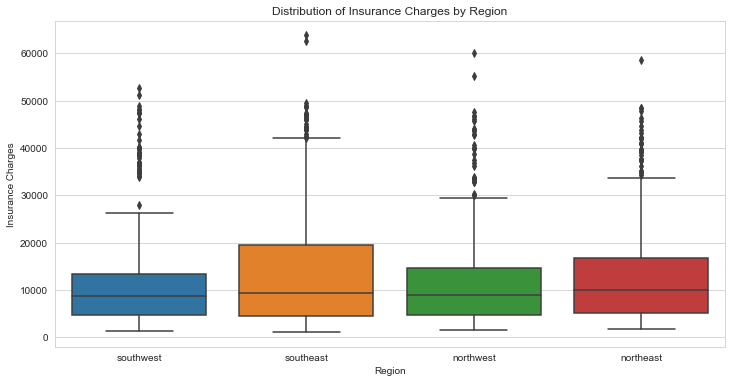

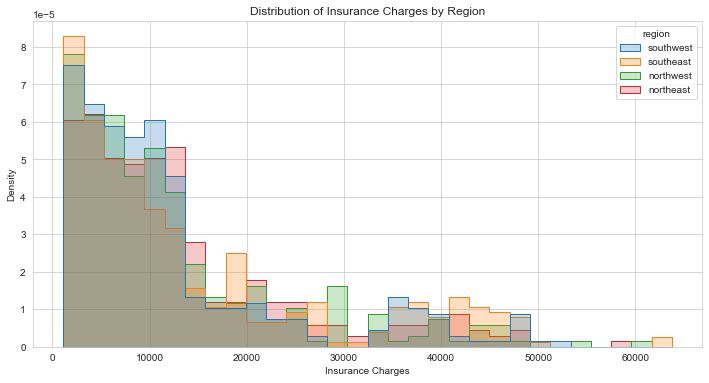

,Northeast,Northwest,Southeast,Southwest
count,324.000000,325.000000,364.000000,325.000000
mean,13406.384516,12417.575374,14735.411438,12346.937377
std,11255.803066,11072.276928,13971.098589,11557.179101
min,1694.796400,1621.340200,1121.873900,1241.565000
25%,5194.322288,4719.736550,4440.886200,4751.070000
50%,10057.652025,8965.795750,9294.131950,8798.593000
75%,16687.364100,14711.743800,19526.286900,13462.520000
max,58571.074480,60021.398970,63770.428010,52590.829390


In [10]:
# Create a boxplot for charges based on region
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='charges', data=insurance_df)
plt.title('Distribution of Insurance Charges by Region')
plt.ylabel('Insurance Charges')
plt.xlabel('Region')
plt.show()

# Create a histogram for charges based on region
plt.figure(figsize=(12, 6))
sns.histplot(insurance_df, x='charges', hue='region', element='step', stat='density', common_norm=False)
plt.title('Distribution of Insurance Charges by Region')
plt.xlabel('Insurance Charges')
plt.ylabel('Density')
plt.show()

# Summary statistics for charges based on region
summary_stats_northeast = northeast_charges.describe()
summary_stats_northwest = northwest_charges.describe()
summary_stats_southeast = southeast_charges.describe()
summary_stats_southwest = southwest_charges.describe()

summary_stats_region = pd.DataFrame({
    'Northeast': summary_stats_northeast,
    'Northwest': summary_stats_northwest,
    'Southeast': summary_stats_southeast,
    'Southwest': summary_stats_southwest
})

summary_stats_region

In [11]:
from scipy.stats import chi2_contingency

# Create a contingency table for gender and smoking status
contingency_gender_smoker = pd.crosstab(insurance_df['sex'], insurance_df['smoker'])

# Conduct Chi-squared test
chi2_stat_gender_smoker, p_value_chi2_gender_smoker, _, _ = chi2_contingency(contingency_gender_smoker)

chi2_stat_gender_smoker, p_value_chi2_gender_smoker

(7.39291081459996, 0.006548143503580696)

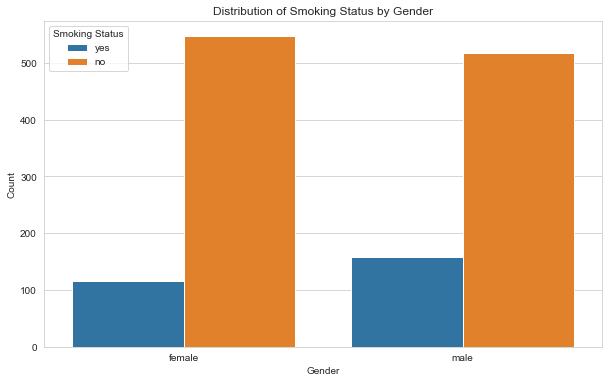

smoker,no,yes
sex,,
female,547,115
male,517,159


In [12]:
# Create a bar plot for smoking status based on gender
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='smoker', data=insurance_df)
plt.title('Distribution of Smoking Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Smoking Status')
plt.show()

# Display the contingency table for gender and smoking status
contingency_gender_smoker

In [13]:
# Create a contingency table for region and smoking status
contingency_region_smoker = pd.crosstab(insurance_df['region'], insurance_df['smoker'])

# Conduct Chi-squared test
chi2_stat_region_smoker, p_value_chi2_region_smoker, _, _ = chi2_contingency(contingency_region_smoker)

chi2_stat_region_smoker, p_value_chi2_region_smoker

(7.343477761407071, 0.06171954839170541)

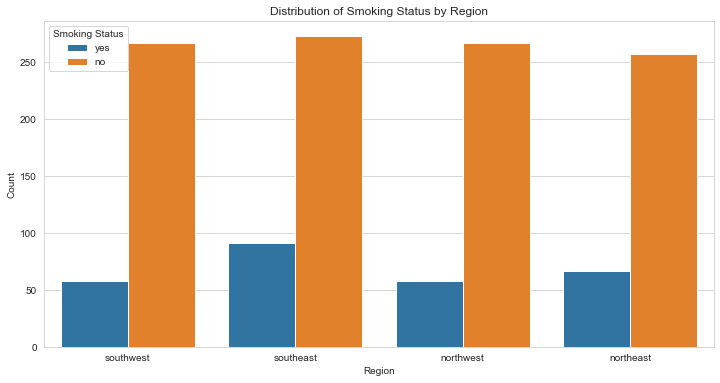

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


In [14]:
# Create a bar plot for smoking status based on region
plt.figure(figsize=(12, 6))
sns.countplot(x='region', hue='smoker', data=insurance_df)
plt.title('Distribution of Smoking Status by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Smoking Status')
plt.show()

# Display the contingency table for region and smoking status
contingency_region_smoker